## Exercise 2

#### Name: Charles Kevin Bandala

#### Student Number: 202220041

In [1]:
# Libraries used:
library(fpp2)
library(ggplot2)
library(nortest)
library(forecast)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

-- Attaching packages ---------------------------------------------- fpp2 2.5 --

v ggplot2   3.4.1     v fma       2.5  
v forecast  8.21      v expsmooth 2.3  





#### MRT3 data

In [2]:
Philmonth <- read.csv("/Users/ckabandala/Desktop/FILES/PMDSA/PMDSA Files/Forecasting Analytics/Datasets/PhilMonthlyData.csv", header = TRUE)

# mrt3 data, January 2001 - October 2010
mrt3 <- ts(na.omit(Philmonth$mrt3), start = c(2001, 1), end = c(2010, 10), frequency = 12)
mrt3

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2001,6.850686,6.546431,7.476868,6.251491,7.118796,7.416309,8.059856,8.329166,7.947605,8.613773,7.606151,8.045016
2002,8.160724,7.567509,7.354889,7.856958,8.090636,8.215791,8.603687,9.635311,9.247382,9.585241,9.034544,9.090892
2003,9.463295,8.949173,9.417472,7.654948,8.579208,9.082575,9.474239,9.537719,10.036791,10.408300,9.748272,10.295482
2004,10.051192,9.837601,10.681316,8.600102,9.651535,10.193104,10.951598,10.563073,10.643026,10.572978,10.293693,10.472951
2005,10.767535,9.941404,10.077543,10.485899,10.587855,10.622520,11.914817,11.527030,11.299545,10.861787,10.393540,10.921847
2006,11.538453,10.769229,11.943464,9.907209,11.603446,11.167889,11.242020,11.674178,10.623740,11.521535,11.684497,11.495727
2007,12.003233,11.102544,12.186469,9.847325,11.835248,11.726919,12.545080,12.163511,12.349352,12.748860,12.015027,12.362489
2008,12.760261,12.140166,11.182082,12.547164,12.770914,11.853520,13.197729,12.621000,12.849000,13.103909,12.429646,12.129185
2009,12.891166,12.226451,13.118143,10.880246,12.636363,12.402647,13.436322,12.681458,12.694556,13.335114,12.695041,12.698883
2010,12.736012,12.281050,13.355286,11.183852,12.463385,12.376655,13.162288,13.198381,13.236251,13.185631,,


#### Autoplot, Seasonplot, Subseries

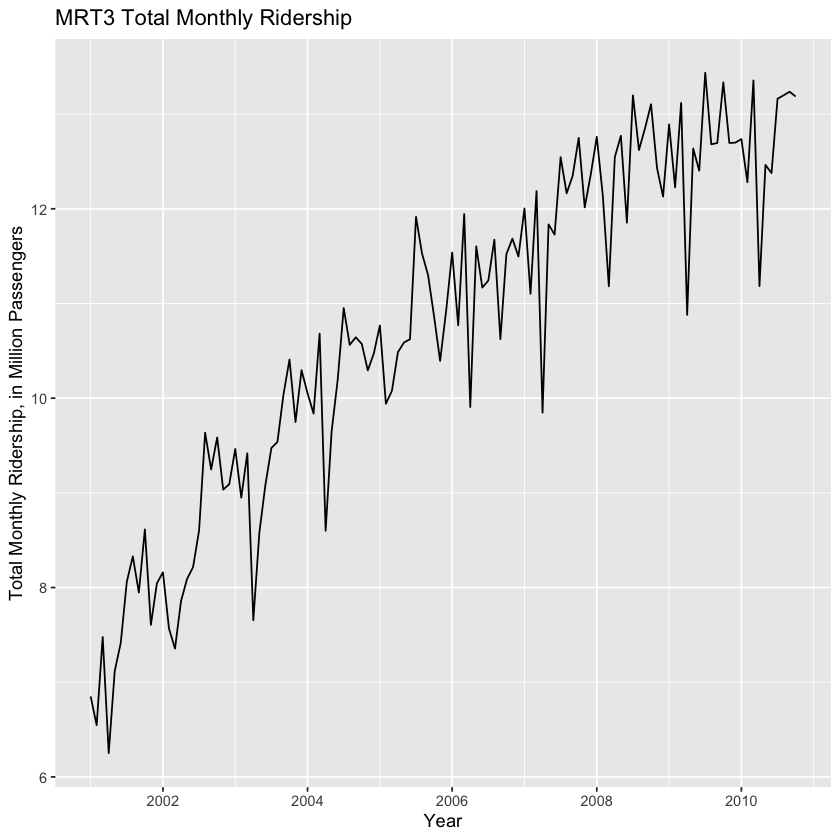

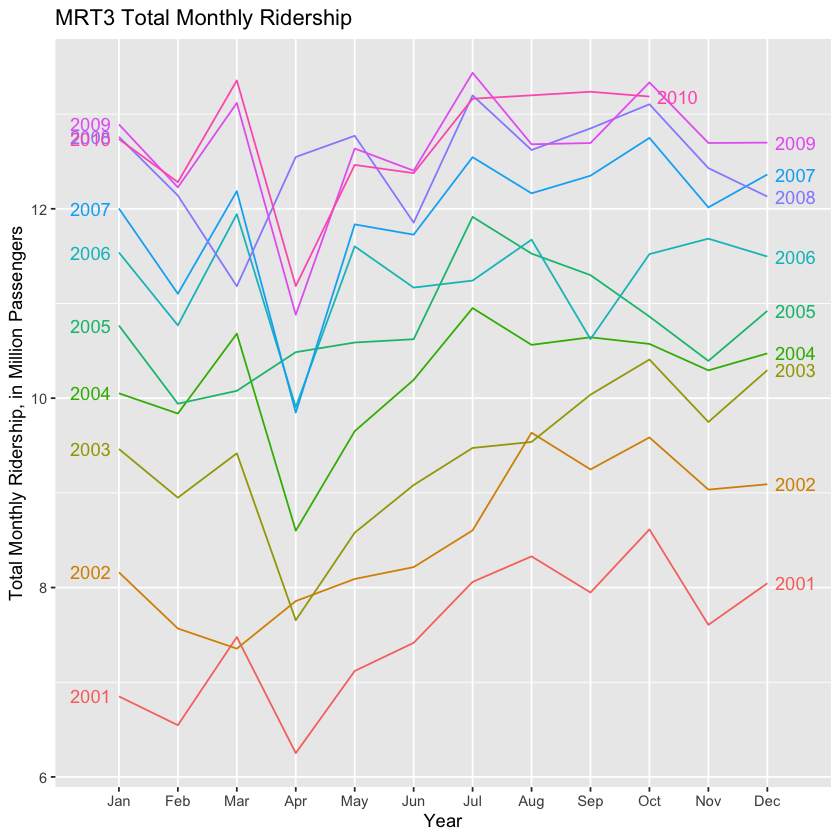

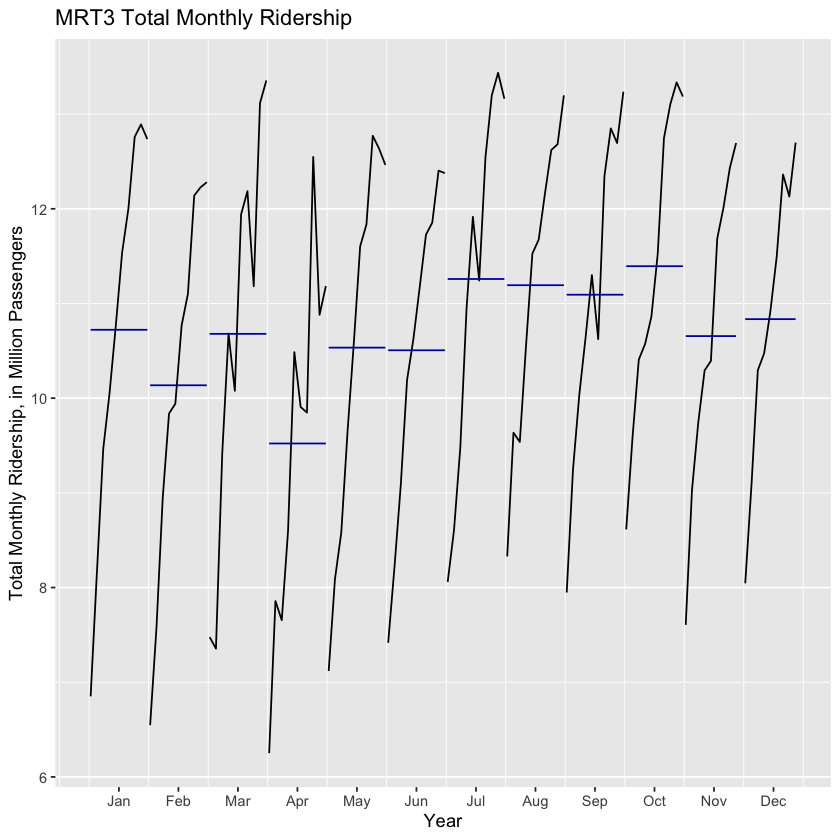


	Ljung-Box test

data:  Residuals
Q* = 1214.1, df = 24, p-value < 2.2e-16

Model df: 0.   Total lags used: 24



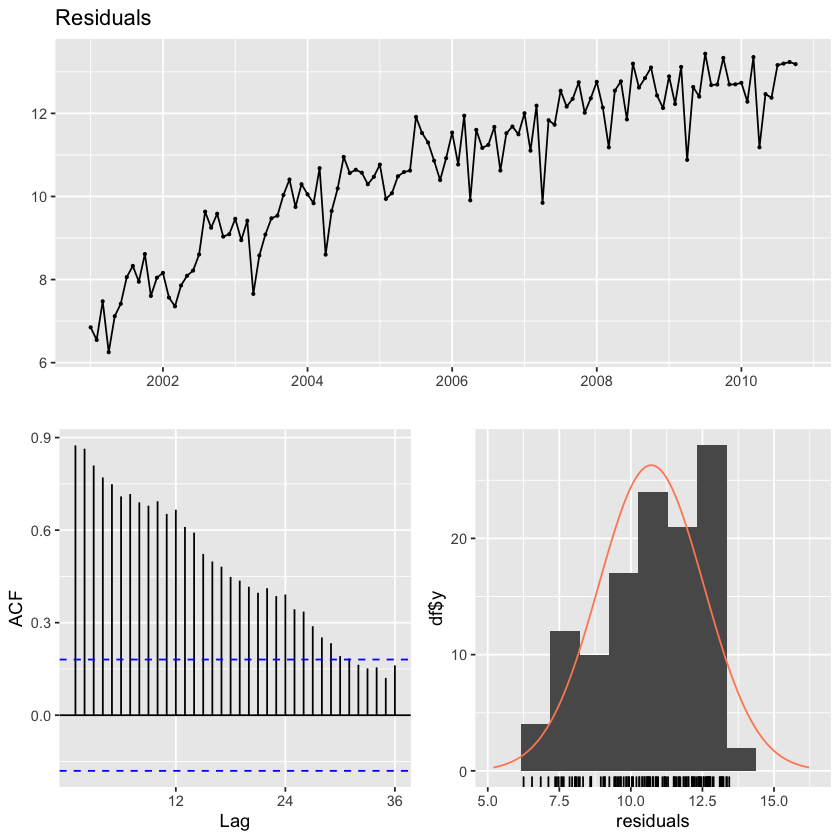

In [3]:
autoplot(mrt3) +
  ggtitle("MRT3 Total Monthly Ridership") +
  xlab("Year") +
  ylab("Total Monthly Ridership, in Million Passengers")

ggseasonplot(mrt3, year.labels = TRUE, year.labels.left = TRUE) +
  ggtitle("MRT3 Total Monthly Ridership") +
  xlab("Year") +
  ylab("Total Monthly Ridership, in Million Passengers")

ggsubseriesplot(mrt3) +
  ggtitle("MRT3 Total Monthly Ridership") +
  xlab("Year") +
  ylab("Total Monthly Ridership, in Million Passengers")

checkresiduals(mrt3)

#### Train and Test dataset

In [4]:
mrt3_train <- window(mrt3, end = c(2008, 10)) # January 2001 - October 2008
mrt3_test <- window(mrt3, start = c(2008, 11)) # November 2008 - October 2010

mrt3_train
mrt3_test

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2001,6.850686,6.546431,7.476868,6.251491,7.118796,7.416309,8.059856,8.329166,7.947605,8.613773,7.606151,8.045016
2002,8.160724,7.567509,7.354889,7.856958,8.090636,8.215791,8.603687,9.635311,9.247382,9.585241,9.034544,9.090892
2003,9.463295,8.949173,9.417472,7.654948,8.579208,9.082575,9.474239,9.537719,10.036791,10.408300,9.748272,10.295482
2004,10.051192,9.837601,10.681316,8.600102,9.651535,10.193104,10.951598,10.563073,10.643026,10.572978,10.293693,10.472951
2005,10.767535,9.941404,10.077543,10.485899,10.587855,10.622520,11.914817,11.527030,11.299545,10.861787,10.393540,10.921847
2006,11.538453,10.769229,11.943464,9.907209,11.603446,11.167889,11.242020,11.674178,10.623740,11.521535,11.684497,11.495727
2007,12.003233,11.102544,12.186469,9.847325,11.835248,11.726919,12.545080,12.163511,12.349352,12.748860,12.015027,12.362489
2008,12.760261,12.140166,11.182082,12.547164,12.770914,11.853520,13.197729,12.621000,12.849000,13.103909,,


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2008,,,,,,,,,,,12.42965,12.12918
2009,12.89117,12.22645,13.11814,10.88025,12.63636,12.40265,13.43632,12.68146,12.69456,13.33511,12.69504,12.69888
2010,12.73601,12.28105,13.35529,11.18385,12.46339,12.37665,13.16229,13.19838,13.23625,13.18563,,


a) Seasonal Naive method

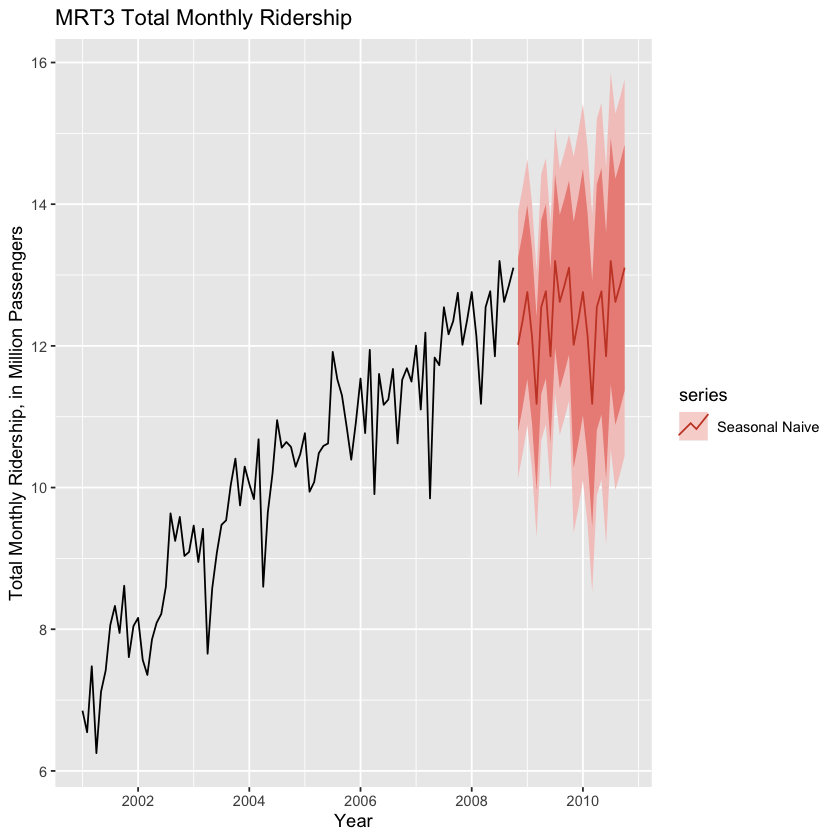

In [5]:
mrt3_snaive <- snaive(mrt3_train)
mrt3_snaivef <- forecast(mrt3_snaive, h = 24)

# Forecasted values, h = 24
autoplot(mrt3_train) +
  autolayer(mrt3_snaivef, series="Seasonal Naive") +
  ggtitle("MRT3 Total Monthly Ridership") + xlab("Year") +
  ylab("Total Monthly Ridership, in Million Passengers")

b) Linear Trend & Seasonal Dummies Regression model

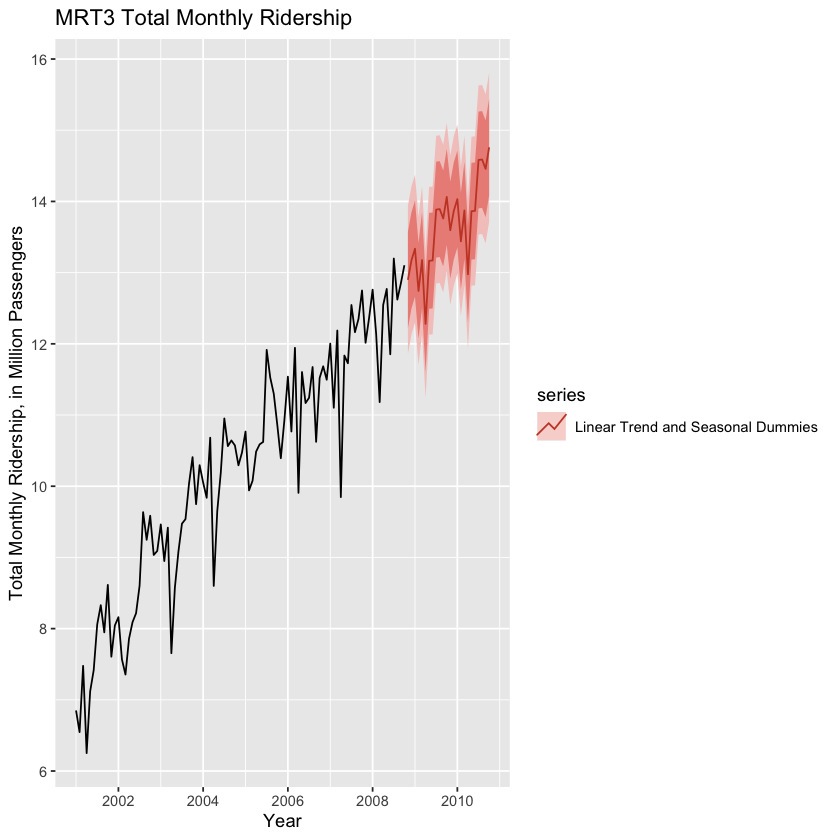

In [6]:
mrt3_linear <- tslm(mrt3_train ~ trend + season)
mrt3_linearf <- forecast(mrt3_linear, h = 24)

# Forecasted values, h = 24
autoplot(mrt3_train) +
  autolayer(mrt3_linearf, series="Linear Trend and Seasonal Dummies") +
  ggtitle("MRT3 Total Monthly Ridership") + xlab("Year") +
  ylab("Total Monthly Ridership, in Million Passengers")

c) Exponential Trend and Seasonal Dummies Regression model

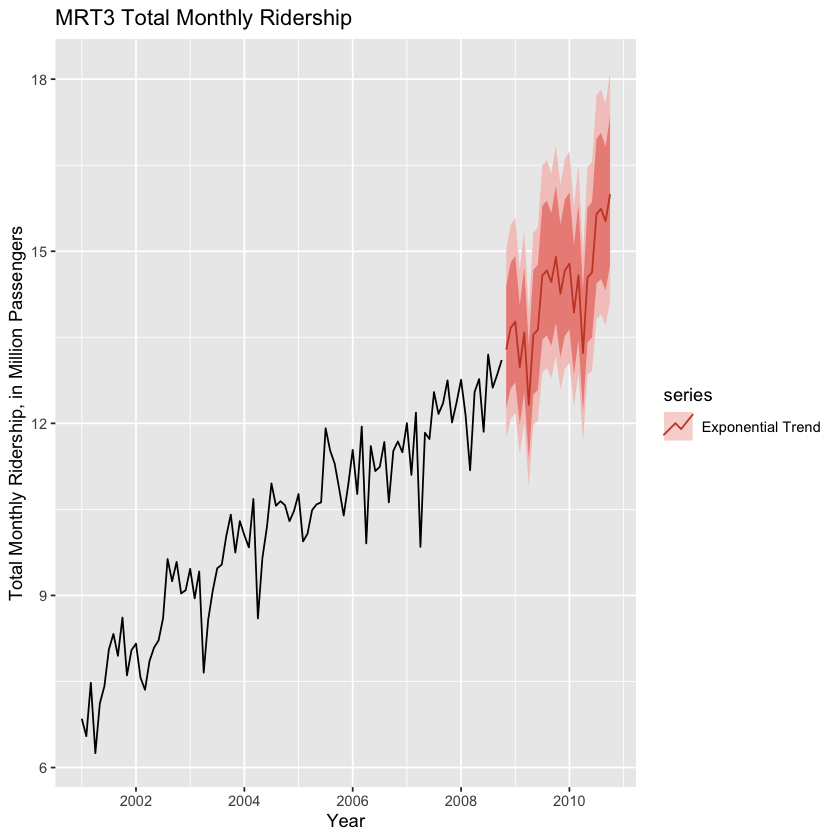

In [11]:
mrt3_exp <- tslm(mrt3_train ~ trend + season, lambda = 0)
mrt3_expf <- forecast(mrt3_exp, h = 24)

# Forecasted values, h = 24
autoplot(mrt3_train) +
  autolayer(mrt3_expf, series="Exponential Trend") +
  ggtitle("MRT3 Total Monthly Ridership") + xlab("Year") +
  ylab("Total Monthly Ridership, in Million Passengers")

d) STL model (t.window = 13 & s.window = 13)

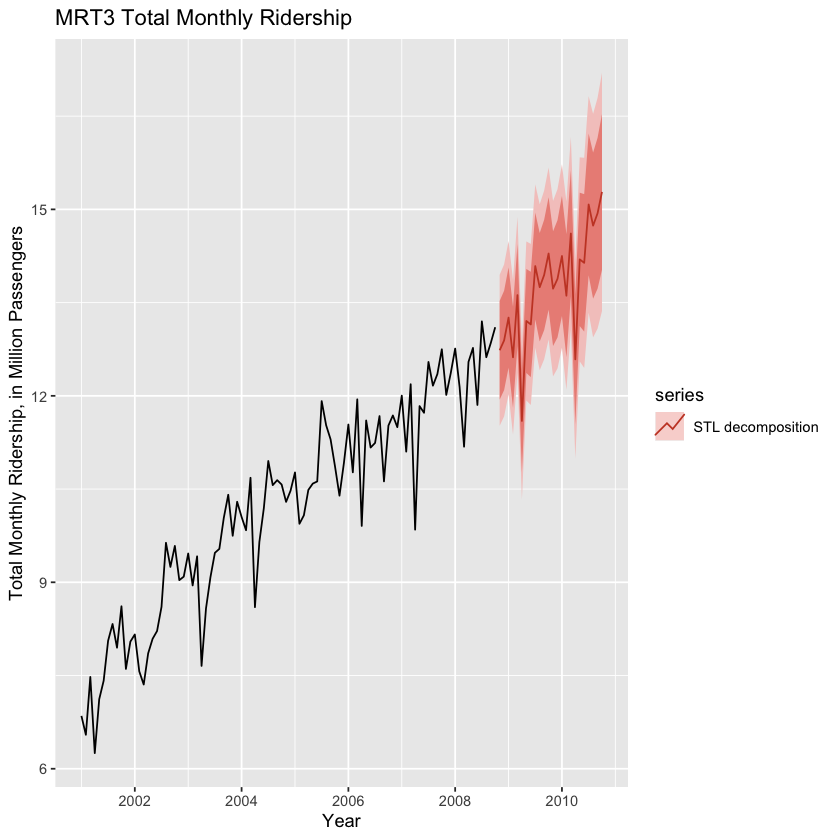

In [14]:
mrt3_stl <- stlf(mrt3_train, t.window = 13, s.window = 13, h=24, robust = T)

# or

mrt3_stl2 <- stl(mrt3_train, t.window = 13, s.window = 13)
mrt3_stl2f <- forecast(mrt3_stl2, h = 24)

# Forecasted values, h = 24
autoplot(mrt3_train) +
  autolayer(mrt3_stl, series="STL decomposition") +
  ggtitle("MRT3 Total Monthly Ridership") + xlab("Year") +
  ylab("Total Monthly Ridership, in Million Passengers")

e) Exponential Natural Cubic Smoothing Spline model

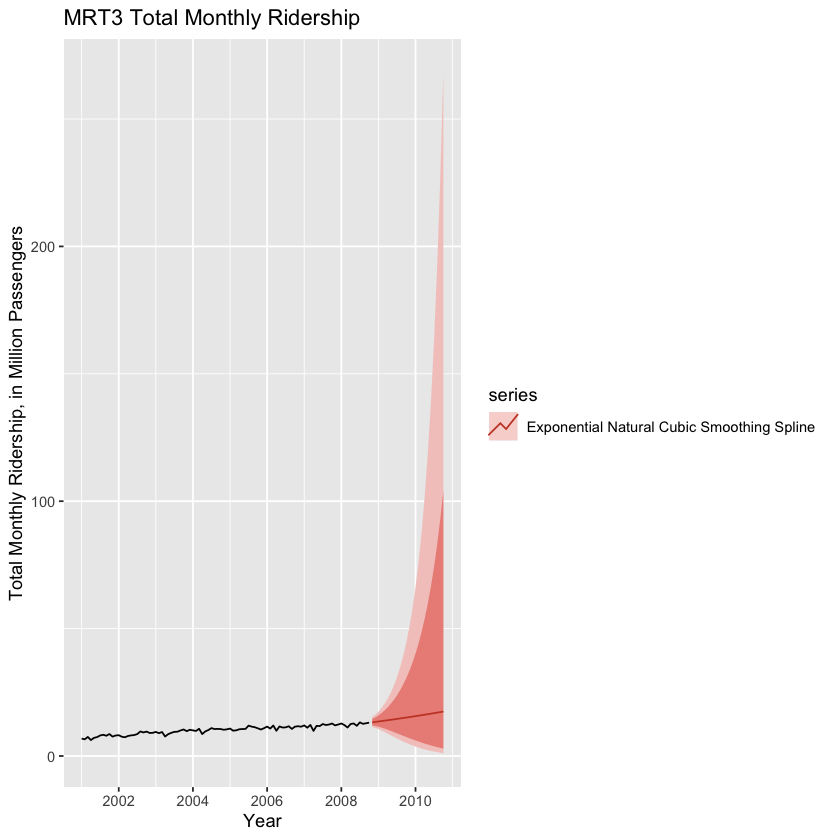

In [15]:
mrt3_spl <- splinef(mrt3_train, lambda = 0, h = 24)

# Forecasted values, h = 24
autoplot(mrt3_train) +
  autolayer(mrt3_spl, series="Exponential Natural Cubic Smoothing Spline") +
  ggtitle("MRT3 Total Monthly Ridership") + xlab("Year") +
  ylab("Total Monthly Ridership, in Million Passengers")

#### Accuracy measures of the models

In [16]:
accuracy(mrt3_snaive, mrt3_test)
accuracy(mrt3_linearf, mrt3_test)
accuracy(mrt3_expf, mrt3_test)
accuracy(mrt3_stl, mrt3_test)
accuracy(mrt3_spl, mrt3_test)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.7212331,0.9586158,0.8192067,6.946679,7.900074,1.0000000,-0.03242525,NA
Test set,0.1928121,0.7977146,0.5194578,1.298273,4.185158,0.6340985,-0.38710809,0.837935


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,2.835823e-17,0.4478685,0.3533818,-0.2633193,3.614693,0.4313707,0.1291742,NA
Test set,-1.000622e+00,1.0940654,1.0006222,-8.0031468,8.003147,1.2214527,0.2076503,1.138949


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.009041048,0.5267757,0.4261202,-0.1421768,4.294584,0.520162,0.3385208,NA
Test set,-1.645213900,1.7552489,1.6452139,-13.0266065,13.026607,2.008301,0.6282187,1.827492


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-0.005172197,0.4872673,0.3293015,-0.2078036,3.292595,0.4019761,-0.09367044,NA
Test set,-1.114417423,1.2272503,1.1144174,-8.7996762,8.799676,1.3603618,0.75903407,1.289968


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.002105746,0.7504308,0.6037413,-0.2409904,6.098286,0.7369829,-0.2259602,NA
Test set,-2.593711716,2.8784149,2.5937117,-20.6866945,20.686695,3.1661262,0.6345740,3.009147


#### Forecast of the models

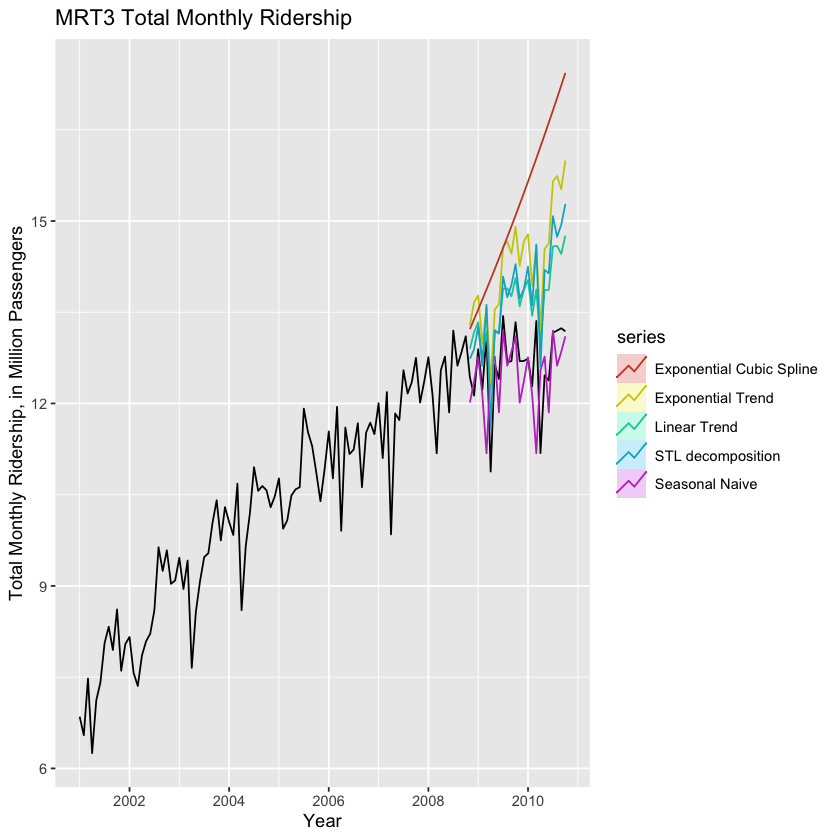

In [12]:
autoplot(mrt3) +
  autolayer(mrt3_snaivef, series="Seasonal Naive", PI = FALSE) +
  autolayer(mrt3_linearf, series="Linear Trend", PI = FALSE) +
  autolayer(mrt3_expf, series="Exponential Trend", PI = FALSE) +
  autolayer(mrt3_stl, series="STL decomposition", PI = FALSE) +
  autolayer(mrt3_spl, series="Exponential Cubic Spline", PI = FALSE) +
  ggtitle("MRT3 Total Monthly Ridership") + xlab("Year") +
  ylab("Total Monthly Ridership, in Million Passengers")

#### Write a short paragraph explaining your choice of the best-fitting model.

The trend of the mrt3 data clearly goes upward across the data. It also shows a strong seasonality each year with April being the lowest among the months. However, pattern seems to be different for the years 2002, 2005, and 2008. Among the models, accuracy measures point out the seasonal naive to be the best model. High seasonality in the data favors the seasonal naive. With this method/model, forecasted values are predicted the same with the last observed value. Furthermore, it shows to fit well with the test data. Lack of adaptability to changes or trends might be the cause of missing some spikes with the test data

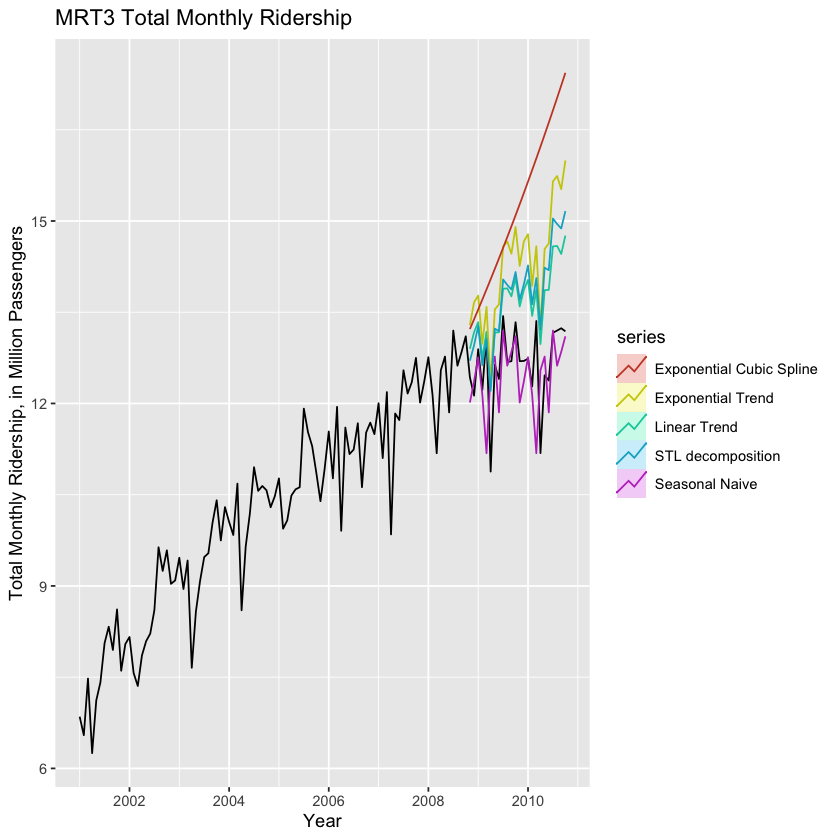

In [59]:
autoplot(mrt3) +
  autolayer(mrt3_snaivef, series="Seasonal Naive", PI = FALSE) +
  autolayer(mrt3_linearf, series="Linear Trend", PI = FALSE) +
  autolayer(mrt3_expf, series="Exponential Trend", PI = FALSE) +
  autolayer(mrt3_stl, series="STL decomposition", PI = FALSE) +
  autolayer(mrt3_spl, series="Exponential Cubic Spline", PI = FALSE) +
  ggtitle("MRT3 Total Monthly Ridership") + xlab("Year") +
  ylab("Total Monthly Ridership, in Million Passengers")

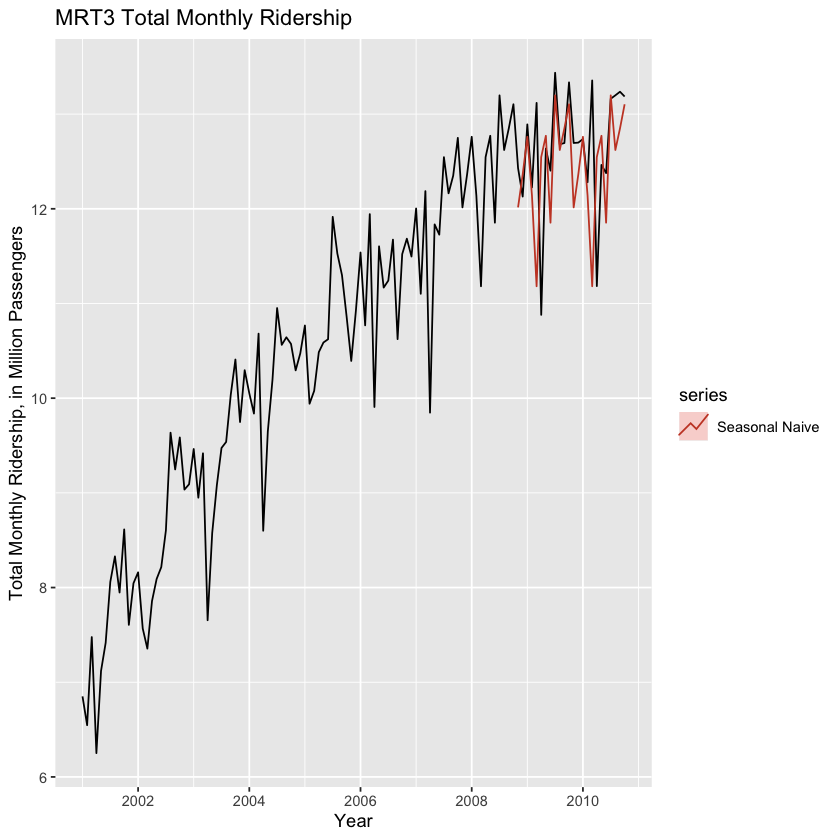

In [58]:
autoplot(mrt3) +
  autolayer(mrt3_snaivef, series="Seasonal Naive", PI = FALSE) +
  ggtitle("MRT3 Total Monthly Ridership") + xlab("Year") +
  ylab("Total Monthly Ridership, in Million Passengers")


	Ljung-Box test

data:  Residuals from Seasonal naive method
Q* = 27.635, df = 19, p-value = 0.0907

Model df: 0.   Total lags used: 19



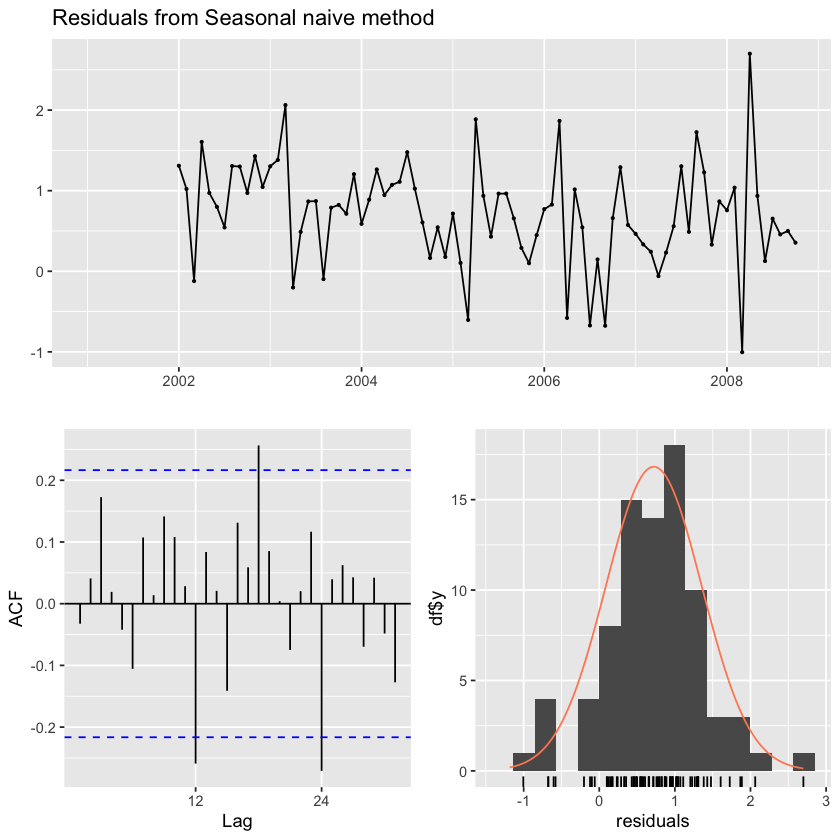

In [29]:
checkresiduals(mrt3_snaive)